# array connection
- hstack
- vstack
- dstack
- stack
- r_
- c_
- tile

In [1]:
import numpy as np

In [2]:
a1 = np.ones((2,3),dtype = int)
a1

array([[1, 1, 1],
       [1, 1, 1]])

In [3]:
a2 = np.zeros((2,2), dtype=int)
a2

array([[0, 0],
       [0, 0]])

In [4]:
np.hstack([a1,a2])

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0]])

In [5]:
b1 = np.ones((2,3),dtype=int)
b1

array([[1, 1, 1],
       [1, 1, 1]])

In [6]:
b2 = np.zeros((3,3), dtype=int)
b2

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [7]:
np.vstack([b1,b2])

array([[1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [8]:
c1 = np.ones((3,4))
c1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [9]:
c2 = np.zeros((3,4))
c2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

`dstack` 명령은 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다. 가장 안쪽의 원소의 차원이 증가한다. 즉 가장 내부의 숫자 원소가 배열이 된다. shape 정보로 보자면 가장 끝에 값이 2인 차원이 추가되는 것이다.이 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x 2)가 된다.

In [10]:
cq = np.dstack([c1,c2])

In [11]:
print(cq.shape,c1.shape, c2.shape)

(3, 4, 2) (3, 4) (3, 4)


`stack` 명령은 `dstack`의 기능을 확장한 것으로 `dstack`처럼 마지막 차원으로 연결하는 것이 아니라 사용자가 지정한 차원(축으로) 배열을 연결한다. axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다.

다음 예에서는 axis=0 이므로 가장 바깥에 값이 2인 차원이 추가된다. 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (2 x 3 x 4) 이다..

In [12]:
cs = np.stack([c1,c2])
cs

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## 2차원 그리드 포인트 생성

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 2차원 영역에 대한 (x,y) 좌표값 쌍 즉, 그리드 포인트(grid point)를 생성하여 각 좌표에 대한 함수 값을 계산해야 한다. 예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지, y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면 이 사각형 영역 안의 다음과 같은 그리드 포인트들에 대해 함수를 계산해야 한다.

(x,y)=(0,0),(0,1),(0,2),(0,3),(0,4),(1,0),⋯(2,4)
meshgrid

이러한 그리드 포인트를 만드는 과정을 도와주는 것이 meshgrid 명령이다. meshgrid 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [13]:
x = np.arange(3)
x

array([0, 1, 2])

In [14]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [15]:
X,Y = np.meshgrid(x,y)

In [16]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [17]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [18]:
[list(zip(x,y)) for x,y in zip(X,Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

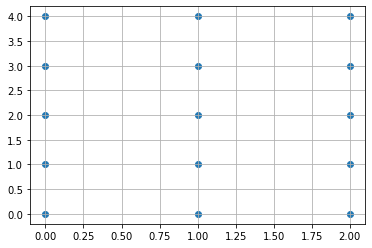

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.grid()

## 메모리를 아끼는 작업입니다. 희소 그리드(sparse grid)라고 합니다

In [26]:
x2,y2 = np.meshgrid(X,Y,sparse=True)
x2

array([[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [27]:
y2

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4]])

## Zip() function
- 두그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
- `zip()` 함수는 여러개의 순회 가능한(iterable) 객체를 인자로 받고, 각 객체가 담고 있는 원소를 튜플 형태로 차례로 접근 할 수 있는 반복자(iterator)를 반환. 


In [19]:
row = [1,2,3]
col = [1,2,3]
for pair in zip(row,col):
    print(pair)

(1, 1)
(2, 2)
(3, 3)


In [20]:
for pair in zip(X,Y):
    print(pair)

(array([0, 1, 2]), array([0, 0, 0]))
(array([0, 1, 2]), array([1, 1, 1]))
(array([0, 1, 2]), array([2, 2, 2]))
(array([0, 1, 2]), array([3, 3, 3]))
(array([0, 1, 2]), array([4, 4, 4]))


In [22]:
value1 = [list(pair[0]) for pair in zip(X,Y)]
print(value1)

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
